In [ ]:
#掛載GoogleDrive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


[[294 163 140  46]
 [274 210 201  67]]
ROI 1


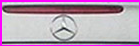

ROI 2


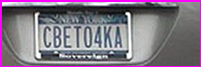

input


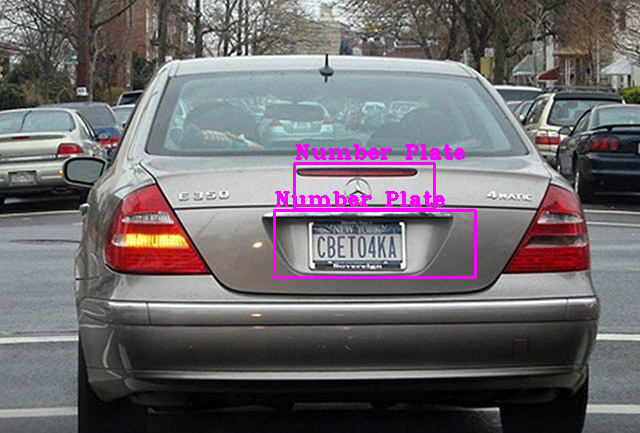

In [7]:
'''cv65: 級聯分類與哈爾小波之車牌辨識'''
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

#讀入兩幅影像
pathname = '/content/gdrive/My Drive/Colab Notebooks/'
nPlateCascade = cv2.CascadeClassifier(pathname + 'data/haarcascades/haarcascade_russian_plate_number.xml')
img = cv2.imread(pathname + 'data/plates2.jpg')
imgGray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
 
numberPlates = nPlateCascade.detectMultiScale(imgGray, 1.1, 5)
print(numberPlates)

minArea =100
color = (255,0,255)

n=0
for (x,y,w,h) in numberPlates:
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    area = w*h
    if area > minArea:
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 255), 2)
        cv2.putText(img,"Number Plate",(x,y-5),
        cv2.FONT_HERSHEY_COMPLEX_SMALL,1,color,2)
        imgRoi = img[y:y+h,x:x+w]
        n+=1;
        print('ROI '+str(n))
        cv2_imshow(imgRoi)

print('input') 
cv2_imshow(img)